# アタポン
* 2020/11開催のアタポンイベントの1位ポイントを推定する
* イベント期間(h)を使った、時変係数モデル

## インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [2]:
input_dir = '../../common/event_data/'

In [3]:
# pickleで保存してあるもの
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df.loc[df['形式'] == 'アタポン', ['日付', '1位', '期間', 'イベント']].set_index('日付')
df

,1位,期間,イベント
日付,,,
2015-09-25,427777,249.0,アタシポンコツアンドロイド
2015-10-19,324369,198.0,Nation Blue
2015-11-20,350000,150.0,Orange Sapphire
2015-12-18,520000,222.0,Snow Wings
2016-01-20,602529,174.0,パステルピンクな恋
2016-02-18,523819,174.0,オルゴールの小箱
2016-03-20,530000,174.0,絶対特権主張しますっ！
2016-04-19,666666,174.0,つぼみ
2016-05-19,844167,198.0,明日また会えるよね


In [16]:
# pickleに保存した以降のイベントを追加
df = pd.concat([df,
           pd.DataFrame(
               data=[
                   [datetime.date(2020, 9, 20), 1250000, 174.0, 'オレンジタイム'],
                   [datetime.date(2020, 10, 20), 1230000, 198.0, 'THE VILLAIN’S NIGHT'],
               ], columns=['日付', '1位', '期間', 'イベント']
           ).set_index('日付')]
          ,axis=0)
df.tail()

,1位,期間,イベント
日付,,,
2020-06-19,1123140,174.0,Sing the Prologue♪
2020-07-20,1120703,174.0,太陽の絵の具箱
2020-08-19,1250000,174.0,ヒーローヴァーサスレイナンジョー
2020-09-20,1250000,174.0,オレンジタイム
2020-10-20,1230000,198.0,THE VILLAIN’S NIGHT


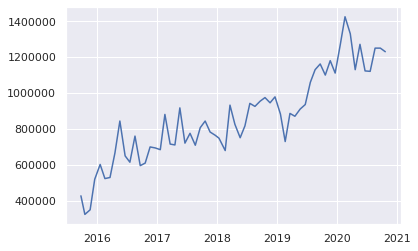

In [17]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '1位']
ax.plot(x, y)
plt.show()

## 次のイベント予測

**ローカル線形トレンド+時系変数モデル**
* xxx
  * 開催日：2020/11/xx
  * 期間：xxx h
  * １位ポイント（答え）：???

In [18]:
# 「xxx」の情報
pred_event_info = {
    '日付': datetime.date(2020, 11, ),
    '期間': x.0,
}
pred_event_info

{'日付': datetime.date(2020, 9, 20), '期間': 174.0, '1位': 1250000}

### stanデータ準備

In [16]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['1位'].tolist(), # 観測値
    'pred_term': 1,
    'pred_len' : [pred_event_info['期間']]
}

In [11]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
  int pred_term; // 予測期間の長さ
  vector[pred_term] pred_len; // 予測イベントのイベント期間(h)
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準+ドリフト成分の推定値
  vector[T] delta;   // ドリフト成分の推定値
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_z; // ドリフト成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
  real<lower=0> s_t; // lenの係数の変化を表す標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1] + delta[i-1], s_w);
    delta[i] ~ normal(delta[i-1], s_z);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
generated quantities{
  vector[T + pred_term] delta_pred;
  vector[T + pred_term] mu_pred;
  vector[T + pred_term] b_len_pred;   // lenの係数
  vector[T + pred_term] alpha_pred;
  delta_pred[1:T] = delta;
  mu_pred[1:T] = mu;
  b_len_pred[1:T] = b_len;
  alpha_pred[1:T] = alpha;
  for(i in 1:pred_term){
    delta_pred[T+i] = normal_rng(delta_pred[T+i-1], s_z);
    mu_pred[T+i] = normal_rng(mu_pred[T+i-1]+delta[T+i-1], s_w);
    b_len_pred[T+i] = normal_rng(b_len_pred[T+i-1], s_t);
    alpha_pred[T+i] = mu_pred[T+i] + b_len_pred[T+i] * pred_len[i];
  }
}
"""

### Stan実行

In [12]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_321a73203f293d4a69c4a783b9abcfe9 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpem9e6vdm\stanfit4anon_model_321a73203f293d4a69c4a783b9abcfe9_135685411010381919.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 36.4 s


In [27]:
# パラメータ設定
n_itr = 5000
n_warmup = n_itr - 1000
chains = 3

In [28]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 1min 14s


In [29]:
# ファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c5_1_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c5_1_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


### 結果確認

In [19]:
# 読み込み
input_dir = '../event_data/'
with open(input_dir + 'c5_1_model.pickle', mode="rb") as f:
    stm = pickle.load(f)
with open(input_dir + 'c5_1_fit.pickle', mode="rb") as f:
    fit = pickle.load(f)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
fit

Inference for Stan model: anon_model_321a73203f293d4a69c4a783b9abcfe9.
3 chains, each with iter=5000; warmup=4000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]       2156.7   75.63 926.32 335.49 1505.8 2208.9 2831.2 3861.4    150   1.02
b_len[1]       2153.3   76.73 898.12  407.4 1509.8 2189.6 2818.5 3806.3    137   1.02
b_len[2]       2305.6   70.98 860.59 614.29 1732.1 2343.2 2922.9 3901.2    147   1.02
b_len[3]       2405.0   61.58 766.62 997.91 1862.2 2421.1 2934.7 3845.2    155   1.02
b_len[4]       2671.0   31.86 712.36 1295.6 2182.5 2687.1 3150.6 4017.0    500   1.01
b_len[5]       2624.4   35.35 736.45 1149.6 2110.0 2649.7 3118.7 4034.8    434   1.01
b_len[6]       2668.0   34.88 729.98 1256.6 2176.0 2696.7 3145.6 4078.5    438   1.01
b_len[7]       2895.7   26.57 669.49 1597.6 2438.2 2892.2 3336.9 4218.5    635    1.0
b_len[8]       3044.3   23.34 628.48 

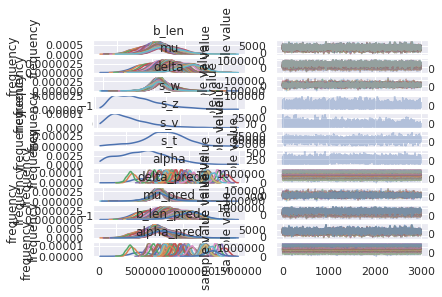

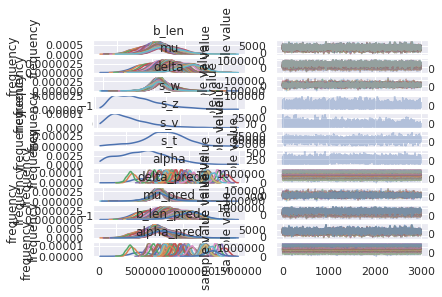

In [21]:
fit.plot()

### 予測結果確認

In [20]:
#x軸
X = df.index
X_pred = df.index.tolist()
X_pred.append(pred_event_info['日付'])

#結果を抽出
ms = fit.extract() 

# alpha
# 事後平均
alpha_mean = ms['alpha_pred'].mean(axis=0)
# #パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_25 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 25), axis=0))
alpha_75 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 75), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 95), axis=0))

#mu
# 事後平均
mu_mean = ms['mu_pred'].mean(axis=0)
#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu_pred']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu_pred']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len_pred'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len_pred']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len_pred']).apply(lambda x: np.percentile(x, 95), axis=0))

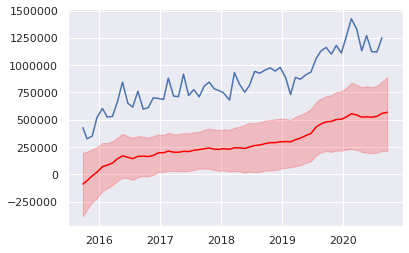

In [21]:
# mu
# トレンド成分
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X_pred, mu_mean, label='trend', c='red')
plt.fill_between(X_pred, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

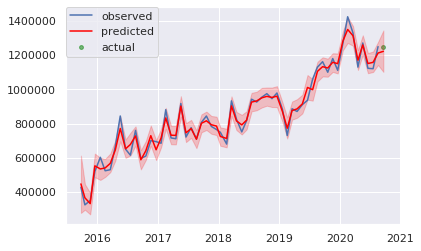

In [36]:
# alpha
# 90%区間
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X_pred, alpha_mean, label='predicted', c='red')
# ax.scatter(pred_event_info['日付'], pred_event_info['1位'], c='green', alpha=0.5, s=15, label='actual')
plt.fill_between(X_pred, alpha_5, alpha_95, color='red', alpha=0.2)
plt.legend(loc='upper left', borderaxespad=0)
plt.show()

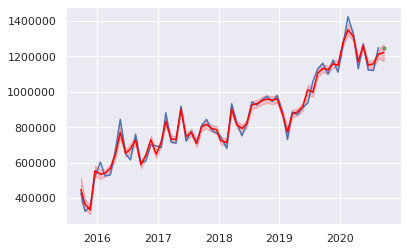

In [29]:
# alpha
# 50%区間
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X_pred, alpha_mean, label='predicted', c='red')
# ax.scatter(pred_event_info['日付'], pred_event_info['1位'], c='green', alpha=0.5, s=15, label='actual')
plt.fill_between(X_pred, alpha_25, alpha_75, color='red', alpha=0.2)
plt.show()

In [24]:
# 点推定
print('点推定:', alpha_mean[-1])
# 区間推定
print('区間推定(90%):', alpha_5[-1], '~', alpha_95[-1])
print('区間推定(50%):', alpha_25[-1], '~', alpha_75[-1])
# 実際の値
print('実測値', pred_event_info['1位'])

点推定: 1222457.667048828
区間推定(90%): 1102110.2576605086 ~ 1344647.4029331487
区間推定(50%): 1172790.1907428827 ~ 1271708.4247498484
実測値 1250000


* 実測値
  * 1,250,000
* 所感
  * xxx